# Exploring 1st Iteration Data

### Setup

In [1]:
# General Imports
import os
import nltk
from itertools import chain

In [2]:
# Add paths for custom code & data
#  This is a bit of a hack to add the directories for code & data, in a general way
#  This approach assumes the everything is located up one directory
base_path = os.path.dirname(os.getcwd())
dat_path = os.path.join(base_path, 'Data')

In [3]:
# Add custom code location to path
#import sys
#sys.path.append(base_path)

# Import custom code
from consc.data import load_folder

### Functions

These are some quick functions to work with the data

In [4]:
def get_all_words(dat, field):
    """Extract all (tokenized) words across a collection of documents."""
    
    all_words = [getattr(doc, field) for doc in dat]
    all_words = list(chain.from_iterable(all_words))
    
    return all_words

### Loading

In [5]:
# Set term to analyze
current_term = 'autism'

# Load the data
paper_dat = load_folder('Papers', current_term, dat_path)
press_dat = load_folder('PRs', current_term, dat_path)

#### Sanity Check Loaded Data

In [6]:
# Check data sizes
print(len(paper_dat))
print(len(press_dat))

498
333


#### Check examples of data

In [9]:
# Paper
for ke, va in paper_dat[0].as_dict().items():
    print(ke, '\t:\t', va)

title 	:	 Generation of induced pluripotent stem cell line, CSSi002-A (2851), from a patient with juvenile Huntington Disease.
text 	:	 Huntington Disease (HD) is an autosomal dominant disorder characterized by motor, cognitive and behavioral features caused by a CAG expansion in the HTT gene beyond 35 repeats. The juvenile form (JHD) may begin before the age of 20years and is associated with expanded alleles as long as 60 or more CAG repeats. In this study, induced pluripotent stem cells were generated from skin fibroblasts of a 8-year-old child carrying a large size mutation of 84 CAG repeats in the HTT gene. HD appeared at age 3 with mixed psychiatric (i.e. autistic spectrum disorder) and motor (i.e. dystonia) manifestations.
date 	:	 2018-01-18_23:44:49
id 	:	 29342448
doi 	:	 10.1016/j.scr.2018.01.011
authors 	:	 [['Rosati', 'Jessica', 'J', 'IRCCS Casa Sollievo della Sofferenza, Cellular Reprogramming Unit, Viale dei Cappuccini, San Giovanni Rotondo, Foggia 71013, Italy. Electroni

In [10]:
# Press Release
for ke, va in press_dat[0].as_dict().items():
    print(ke, '\t:\t', va)

title 	:	 Brain protein predicts recovery time following concussion | EurekAlert! Science News
text 	:	 Experimental Biology 2017April 22 - 26, 2017Chicago, IL2018 AAAS Annual Meeting
February 15 - 19, 2018Austin, TXElevated levels of the brain protein tau following a sport-related concussion are associated with a longer recovery period and delayed return to play for athletes, according to a study published in the January 6, 2017 issue of Neurology®, the medical journal of the American Academy of Neurology. The findings suggest that tau, which can be measured in the blood, may serve as a marker to help physicians determine an athlete's readiness to return to the game.Despite the 3.8 million sports-related concussions that occur annually in the United States, there are no objective tools to confirm when an athlete is ready to resume play. Returning to play too early, before the brain has healed, increases an athlete's risk of long-term physical and cognitive problems, especially if he o

### Pre-Processing

In [11]:
# Collapse across all words in a given data type
all_paper_words = get_all_words(paper_dat, 'words')
all_press_words = get_all_words(press_dat, 'words')

### NLTK 

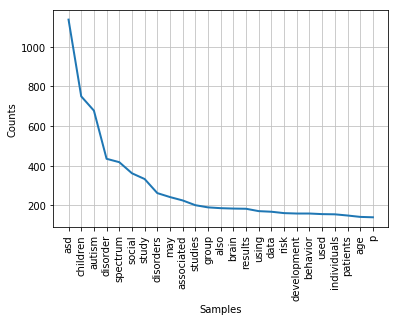

In [12]:
# Create and plot the frequency distribution of words - papers
paper_fd = nltk.FreqDist(all_paper_words)
paper_fd.plot(25)

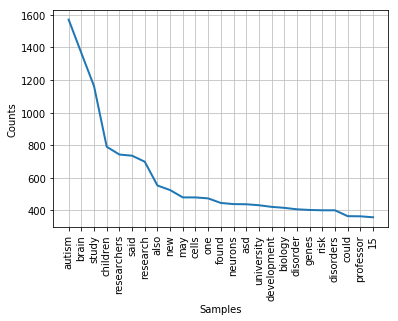

In [13]:
# Create and plot the frequency distribution of words - PRs
press_fd = nltk.FreqDist(all_press_words)
press_fd.plot(25)

### Inspecting Objects

In [14]:
import inspect
inspect.getmembers(press_dat[0])

[('__class__', consc.press_release.Press_Release),
 ('__delattr__',
  <method-wrapper '__delattr__' of Press_Release object at 0x108f009b0>),
 ('__dict__',
  {'article_link': '',
   'date': '2018-01-19_20:57:39',
   'description': '',
   'funder': '',
   'institution': '',
   'journal': '',
   'keywords': [],
   'meeting': '',
   'region': '',
   'sentences': ['Experimental Biology 2017April 22 - 26, 2017Chicago, IL2018 AAAS Annual Meeting\nFebruary 15 - 19, 2018Austin, TXElevated levels of the brain protein tau following a sport-related concussion are associated with a longer recovery period and delayed return to play for athletes, according to a study published in the January 6, 2017 issue of Neurology®, the medical journal of the American Academy of Neurology.',
    "The findings suggest that tau, which can be measured in the blood, may serve as a marker to help physicians determine an athlete's readiness to return to the game.Despite the 3.8 million sports-related concussions that 